<a href="https://colab.research.google.com/github/teethavattcp/teethavat_port_data/blob/main/Projects/202408_Complete_MKT_Journey/ipynb_notebook01_Join_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset

https://drive.google.com/file/d/1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb/view?usp=drive_link

In [ ]:
import os

In [ ]:
import time

In [ ]:
!gdown https://drive.google.com/uc?id=1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb

Downloading...
From (original): https://drive.google.com/uc?id=1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb
From (redirected): https://drive.google.com/uc?id=1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb&confirm=t&uuid=055af10c-5cd4-446c-be6a-3344751233f6
To: /content/dunnhumby_The-Complete-Journey CSV.zip
100% 134M/134M [00:01<00:00, 87.6MB/s]


In [ ]:
if os.path.exists("/content/Dataset/dunnhumby_The-Complete-Journey CSV"):
  print('The files are already existed.')
else:
  !unzip "/content/dunnhumby_The-Complete-Journey CSV.zip" -d "Dataset"

The files are already existed.


# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
!pip install pandasql

In [ ]:
import pandasql

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
from pathlib import Path

#Define fn for cleaning raw data

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
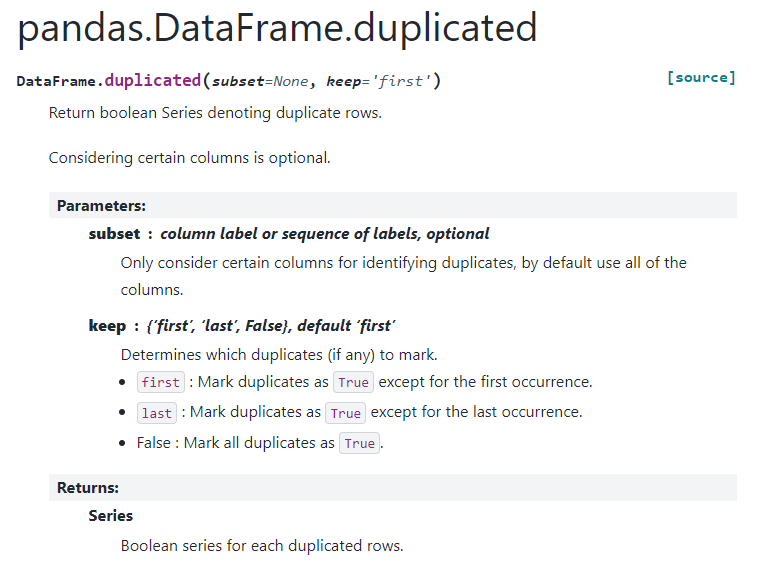

##count_total_duplicates(df)

In [ ]:
def count_total_duplicates(df):
    # Identifying duplicate rows (excluding the first occurrence)
    duplicates = df.duplicated(keep='first')

    # Summing the number of duplicate rows
    total_duplicates = duplicates.sum()

    return total_duplicates

In [ ]:
# Example usage
data = {
    'A': ['foo', 'bar', 'foo', 'baz', 'foo'],
    'B': ['one', 'one', 'two', 'two', 'one'],
    'C': [1, 2, 3, 4, 1],
    'D': [5, 6, 7, 8, 5]
}
df_test = pd.DataFrame(data)
df_test

,A,B,C,D
0,foo,one,1,5
1,bar,one,2,6
2,foo,two,3,7
3,baz,two,4,8
4,foo,one,1,5


In [ ]:
total_duplicates = count_total_duplicates(df_test)
print(f'Total number of duplicate rows: {total_duplicates}')

Total number of duplicate rows: 1


##check_duplication_in_df(df)

In [ ]:
def check_duplication_in_df(df):
  total_duplicates = count_total_duplicates(df)
  if total_duplicates > 0:
    print(f"There are {total_duplicates} duplicate rows in the DataFrame.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows were dropped.")
    print("New shape of dataframe after dropping duplicate rows:",df.shape)
  elif total_duplicates == 0:
    print("No duplicate rows found.")

## format_number(x)

In [ ]:
def format_number(x):
    if isinstance(x, float):
        if x.is_integer():
            return '{:.0f}'.format(x)  # Convert to integer if it's a whole number
        else:
            return '{:.2f}'.format(x)  # Keep as float with 2 decimal places
    return x

## explore_df(df_for_eda)

In [ ]:
def explore_df(df_for_eda):
  print("#Check shape")
  print(df_for_eda.shape,"\n")

  print("#Check duplication")
  check_duplication_in_df(df_for_eda)

  print("\n#Check missing value")
  if df_for_eda.isnull().sum().sum() == 0:
    print("No missing values found.")
  else:
    print("Missing values found:", df_for_eda.isnull().sum().sum())
    print("\nNumber of missing values:\n",df_for_eda.isnull().sum())
    print("\nPercentage of missing values:\n",df_for_eda.isnull().sum()/len(df_for_eda)*100)

  print("\n#Check data type")
  print(df_for_eda.info(),"\n")

  print("\n#Check unique value")
  print(df_for_eda.nunique(),"\n")

  print("#List of column name:\n",df_for_eda.columns.tolist())

## explore_classes_in_df(df,df_col_cat)

In [ ]:
def explore_classes_in_df(df,df_col_cat):
  for col in df_col_cat:
    print ("\n-------- %s --------" % col)
    print (df[col].value_counts())

In [ ]:
def explore_distribution_in_df(df,df_col_num):
  for col in df_col_num:
    #histogram plot
    #plt.figure(figsize=(2.5, 1.25))
    print ("\n-------- %s --------" % col)

    # Create the histogram plot to calculate the max count
    hist = sns.histplot(df[col])

    # Calculate the maximum count (frequency)
    max_count = hist.patches[0].get_height()  # Initialize with the first bar's height
    for bar in hist.patches:
        if bar.get_height() > max_count:
            max_count = bar.get_height()

    # Clear the current plot to redraw with y-axis limit
    plt.clf()

    # Create the histogram plot again
    sns.histplot(df[col])

    # Set the maximum limit for the y-axis
    plt.ylim(top=1.3 * max_count)

    # Display the plot
    plt.title(f'Histogram of {col}')
    plt.show()

    #box plot
    #plt.figure(figsize=(2.5, 1.25))
    plt.clf()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## deepexploredf(df,df_col_cat, df_col_num)

In [ ]:
import matplotlib.cm as cm

In [ ]:
def deepexploredf(df,df_col_cat, df_col_num):
  print("##Explore categorical data")
  if len(df_col_cat) == 0:
    print("No categorical column found.")
  else:
    explore_classes_in_df(df,df_col_cat)

  print("\n##Explore numerical data")
  if len(df_col_num) == 0:
    print("No numerical data found.")
  else:
    print("#Check statistical summary")
    print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())
    print("#Check correlation")
    #plt.figure(figsize = (2,1.25))
    #plt.rcParams.update({'font.size': 10})
    sns.heatmap(df[df_col_num].corr(), annot =True, cmap=cm.coolwarm_r, vmin=-1, vmax=1)
    plt.show()
    #sns.pairplot(df[df_col_num])
    #plt.show()

## export_to_csv(path_of_folder,file_name,df)

In [ ]:
def export_to_csv(path_of_folder,file_name,df):
  filepath = Path(str(path_of_folder)+str(file_name)+'.csv')
  filepath.parent.mkdir(parents=True, exist_ok=True)
  df.to_csv(filepath,mode = 'w', index=False)
  print(str(file_name)+'.csv has been exported successfully.')

In [ ]:
path_folder='/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set'+'/'

## explore_ranges_of_num_field(df,df_col_num)

In [ ]:
def explore_ranges_of_num_field(df,list_col_num):
  for col in df[list_col_num]:
    count_less_than_0_butsmallamount = len(df[(df[col] < 0) & (df[col] > -0.01)]) #-0.01 < value < 0
    count_less_than_0_butlargeamount = len(df[df[col] <= -0.01]) #-0.01 =< value
    count_equal_to_0 = len(df[df[col] == 0])
    count_greater_than_0_but_smallamount = len(df[(df[col] > 0)& (df[col] < 0.01)])
    count_greater_than_0_but_largeamount = len(df[(df[col] >= 0.01)])
    print(col,':')
    print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
    print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
    print(f'Count of values = 0: {count_equal_to_0}')
    print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
    print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
    print('\n')

## add_status_column(df, left_col, right_col, status_col='status')

Add a status column to the DataFrame based on the comparison of two columns from left and right DataFrames.
```
 Parameters:
    - df (pd.DataFrame): The DataFrame resulting from an outer join.
    - left_col (str): The column name from the left DataFrame.
    - right_col (str): The column name from the right DataFrame.
    - status_col (str): The name of the new status column. Default is 'status'.

 Returns:
    - pd.DataFrame: The DataFrame with the added status column.

```


In [ ]:
def add_status_column(df, left_col, right_col, status_col='status'):
    conditions = [
        (df[left_col].notna()) & (df[right_col].notna()),  # Found value in both tables
        (df[left_col].notna()) & (df[right_col].isna()),   # Found value only in the left table
        (df[left_col].isna()) & (df[right_col].notna())    # Found value only in the right table
    ]

    choices = ['Found in both', 'Found only in left', 'Found only in right']

    df[status_col] = pd.Series(np.select(conditions, choices, default=None))
    return df

## dict_k2v_v2k(input_dict)

In [ ]:
def dict_k2v_v2k(input_dict):
  output_dict = {}

  for data_type, columns in input_dict.items():
    for column in columns:
        output_dict[column] = data_type

  return output_dict

# Import data aiming to be merged

## df_transaction_data

In [ ]:
df_transaction_data = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/fact_transaction_data.csv', delimiter=",")
df_transaction_data.drop(columns=['index'],inplace = True)

In [ ]:
# Create a surrogate key by using a new integer column just in case there is duplication of data then they will be used to track down the duplication
df_transaction_data['surrogate_key'] = range(1, len(df_transaction_data) + 1)

## df_coupon_x_redempt

In [ ]:
df_coupon_x_redempt = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/dim_coupon_redempt_outerjoin.csv', delimiter=",")
df_coupon_x_redempt

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt
0,10000089061,27160,4,NaN,NaN,0
1,10000089061,29977,4,NaN,NaN,0
2,10000089061,1038746,4,NaN,NaN,0
3,10000089061,1043590,4,NaN,NaN,0
4,10000089061,1069621,4,NaN,NaN,0
...,...,...,...,...,...,...
2212501,10000089283,1073718,18,2496.0,592.0,1
2212502,10000089283,2194375,18,2496.0,592.0,1
2212503,10000089283,1095926,18,2496.0,592.0,1
2212504,10000089283,1056267,18,2496.0,592.0,1


# Join tables

## Build keys

In [ ]:
df_transaction_data['keytrans_hh_day_pid'] = df_transaction_data['household_key'].astype(str) + '_' + df_transaction_data['DAY'].astype(str) + '_' + df_transaction_data['PRODUCT_ID'].astype(str)

In [ ]:
df_transaction_data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TOTAL_DISC,If_used_retail_loyalprog,If_used_manu_coupon,If_used_giveaway_promo,Actual_card_price,Cust_paid_price,surrogate_key,keytrans_hh_day_pid
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,3.99,3.99,1,1_51_825123
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,2.99,2.99,2,1_51_831447
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,0.0,0.0,-0.30,1,0,0,1.39,1.09,3,1_51_840361
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,0.0,0.0,-0.62,1,0,0,4.33,3.71,4,1_51_845307
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,0.0,0.0,-1.20,1,0,0,3.99,2.79,5,1_51_852014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581261,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,0.0,0.0,-0.80,1,0,0,3.99,3.19,2581262,2500_708_1109947
2581262,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,0.0,0.0,0.00,0,0,0,1.99,1.99,2581263,2500_708_1117514
2581263,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,0.0,0.0,-1.00,1,0,0,3.59,2.59,2581264,2500_708_8019186
2581264,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,-1.0,0.0,-3.02,1,0,0,5.79,3.77,2581265,2500_708_15596705


In [ ]:
df_coupon_x_redempt = df_coupon_x_redempt[df_coupon_x_redempt['Is_coupon_redempt'] == 1]

In [ ]:
df_coupon_x_redempt['keyredempt_hh_day_pid'] = df_coupon_x_redempt['household_key_redempt'].apply(int).astype(str) + '_' + df_coupon_x_redempt['DAY_redempt'].apply(int).astype(int).astype(str) + '_' + df_coupon_x_redempt['PRODUCT_ID'].astype(str)

<ipython-input-32-0eac83648ec9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coupon_x_redempt['keyredempt_hh_day_pid'] = df_coupon_x_redempt['household_key_redempt'].apply(int).astype(str) + '_' + df_coupon_x_redempt['DAY_redempt'].apply(int).astype(int).astype(str) + '_' + df_coupon_x_redempt['PRODUCT_ID'].astype(str)


## Merge table with left join

In [ ]:
df_coupon_x_redempt.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN', 'household_key_redempt',
       'DAY_redempt', 'Is_coupon_redempt', 'keyredempt_hh_day_pid'],
      dtype='object')

### df_trans_x_couponredempt

In [ ]:
df_trans_x_couponredempt = pd.merge(df_transaction_data
                                    , df_coupon_x_redempt #[['COUPON_UPC','keyredempt_hh_day_pid']]
                                    , left_on='keytrans_hh_day_pid', right_on='keyredempt_hh_day_pid', how='left')
df_trans_x_couponredempt

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC,PRODUCT_ID_y,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt,keyredempt_hh_day_pid
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,...,3.99,1,1_51_825123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,...,2.99,2,1_51_831447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,...,1.09,3,1_51_840361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,...,3.71,4,1_51_845307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,...,2.79,5,1_51_852014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581357,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,...,3.19,2581262,2500_708_1109947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581358,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,...,1.99,2581263,2500_708_1117514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581359,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,...,2.59,2581264,2500_708_8019186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581360,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,...,3.77,2581265,2500_708_15596705,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_trans_x_couponredempt.drop_duplicates(inplace=True)
df_trans_x_couponredempt

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC,PRODUCT_ID_y,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt,keyredempt_hh_day_pid
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,...,3.99,1,1_51_825123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,...,2.99,2,1_51_831447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,...,1.09,3,1_51_840361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,...,3.71,4,1_51_845307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,...,2.79,5,1_51_852014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581357,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,...,3.19,2581262,2500_708_1109947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581358,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,...,1.99,2581263,2500_708_1117514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581359,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,...,2.59,2581264,2500_708_8019186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581360,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,...,3.77,2581265,2500_708_15596705,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explore duplicate data after merging
It was found that data has been duplicated about 75 rows, which can be resulted in wrong data interpretation. But the duplicated rows are still unknown.

In [ ]:
df_transaction_data

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TOTAL_DISC,If_used_retail_loyalprog,If_used_manu_coupon,If_used_giveaway_promo,Actual_card_price,Cust_paid_price,surrogate_key,keytrans_hh_day_pid
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,3.99,3.99,1,1_51_825123
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,2.99,2.99,2,1_51_831447
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,0.0,0.0,-0.30,1,0,0,1.39,1.09,3,1_51_840361
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,0.0,0.0,-0.62,1,0,0,4.33,3.71,4,1_51_845307
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,0.0,0.0,-1.20,1,0,0,3.99,2.79,5,1_51_852014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581261,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,0.0,0.0,-0.80,1,0,0,3.99,3.19,2581262,2500_708_1109947
2581262,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,0.0,0.0,0.00,0,0,0,1.99,1.99,2581263,2500_708_1117514
2581263,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,0.0,0.0,-1.00,1,0,0,3.59,2.59,2581264,2500_708_8019186
2581264,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,-1.0,0.0,-3.02,1,0,0,5.79,3.77,2581265,2500_708_15596705


In [ ]:
2581362-2581266

96

In [ ]:
df_trans_x_couponredempt_count = df_trans_x_couponredempt.groupby('surrogate_key')['BASKET_ID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
df_trans_x_couponredempt_count[df_trans_x_couponredempt_count['count']>1]

,surrogate_key,count
328775,328776,2
1550379,1550380,2
891062,891063,2
940650,940651,2
1724781,1724782,2
...,...,...
1808644,1808645,2
2496948,2496949,2
252881,252882,2
2496946,2496947,2


In [ ]:
list_of_dup_surrogate_key = df_trans_x_couponredempt_count[df_trans_x_couponredempt_count['count']>1]['surrogate_key'].tolist()
print(list_of_dup_surrogate_key)

[328776, 1550380, 891063, 940651, 1724782, 940547, 891067, 2523862, 363219, 1169914, 363838, 891072, 1550381, 252871, 2496962, 940644, 940556, 2360953, 363217, 2124769, 1724796, 1004504, 1004505, 2523833, 1724780, 998411, 2570539, 1029634, 2039884, 363831, 328790, 252544, 1523121, 1554203, 252543, 2039882, 135271, 252574, 592083, 2523591, 236057, 2039878, 1724770, 1434944, 1355502, 1550415, 24541, 940525, 2523596, 1808661, 252834, 1004509, 1029653, 2552848, 363192, 940584, 64815, 2552852, 940586, 2448474, 621351, 2552855, 2552857, 876752, 168757, 363197, 2039825, 1626409, 252891, 1307874, 1029660, 1563352, 1550400, 2039848, 328793, 1963497, 940071, 940638, 2496958, 2496957, 573262, 1554223, 962362, 168775, 553981, 2496953, 2447874, 2496951, 2496950, 621332, 1808646, 1808645, 2496949, 252882, 2496947, 252595]


##Finding:
At 1 household at same day and product_id there may have used 2 coupon

In [ ]:
for i in list_of_dup_surrogate_key:
  print('Surrogate_key =', i)
  print('#In df_transaction_data:')
  print(df_transaction_data[df_transaction_data['surrogate_key'] == i].to_markdown())
  print('\n#In df_trans_x_couponredempt:')
  print(df_trans_x_couponredempt[df_trans_x_couponredempt['surrogate_key'] == i].to_markdown())
  print('\n')

Surrogate_key = 328776
#In df_transaction_data:
|        |   household_key |   BASKET_ID |   DAY |   PRODUCT_ID |   QUANTITY |   SALES_VALUE |   STORE_ID |   RETAIL_DISC |   TRANS_TIME |   WEEK_NO |   COUPON_DISC |   COUPON_MATCH_DISC |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |   Cust_paid_price |   surrogate_key |   keytrans_hh_day_pid |
|-------:|----------------:|------------:|------:|-------------:|-----------:|--------------:|-----------:|--------------:|-------------:|----------:|--------------:|--------------------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|------------------:|----------------:|----------------------:|
| 328775 |             334 | 40025741667 |   545 |       870780 |          8 |           3.9 |        293 |         -1.52 |         1827 |        79 |          -0.9 |                -0.9 |        -2.42 |             

##Check with another table: campaign_table & campaign_desc

###Sample checking: data at surrogate_key = 328776

In [ ]:
#df_trans_x_couponredempt['COUPON_UPC'] = df_trans_x_couponredempt['COUPON_UPC'].astype(str)

In [ ]:
df_trans_x_couponredempt[df_trans_x_couponredempt['surrogate_key'] == 328776]

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC,PRODUCT_ID_y,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt,keyredempt_hh_day_pid
328789,334,40025741667,545,870780,8,3.9,293,-1.52,1827,79,...,0.6,328776,334_545_870780,57047091041.0,870780.0,13.0,334.0,545.0,1.0,334_545_870780
328790,334,40025741667,545,870780,8,3.9,293,-1.52,1827,79,...,0.6,328776,334_545_870780,10000085426.0,870780.0,13.0,334.0,545.0,1.0,334_545_870780


In [ ]:
df_trans_x_couponredempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581362 entries, 0 to 2581361
Data columns (total 27 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   household_key             int64  
 1   BASKET_ID                 int64  
 2   DAY                       int64  
 3   PRODUCT_ID_x              int64  
 4   QUANTITY                  int64  
 5   SALES_VALUE               float64
 6   STORE_ID                  int64  
 7   RETAIL_DISC               float64
 8   TRANS_TIME                int64  
 9   WEEK_NO                   int64  
 10  COUPON_DISC               float64
 11  COUPON_MATCH_DISC         float64
 12  TOTAL_DISC                float64
 13  If_used_retail_loyalprog  int64  
 14  If_used_manu_coupon       int64  
 15  If_used_giveaway_promo    int64  
 16  Actual_card_price         float64
 17  Cust_paid_price           float64
 18  surrogate_key             int64  
 19  keytrans_hh_day_pid       object 
 20  COUPON_UPC              

From checking data with another field, they are all relevant, meaning that may choose only one record (maybe max of COUPON_UPC value) to prevent data duplication of numerical fields such as SALES_VALUE, RETAIL_DISC, etc. --> interpreting about coupon might be a little bit wrong but it's at small amount only 96/2 = 48 rows of 2.5M records.

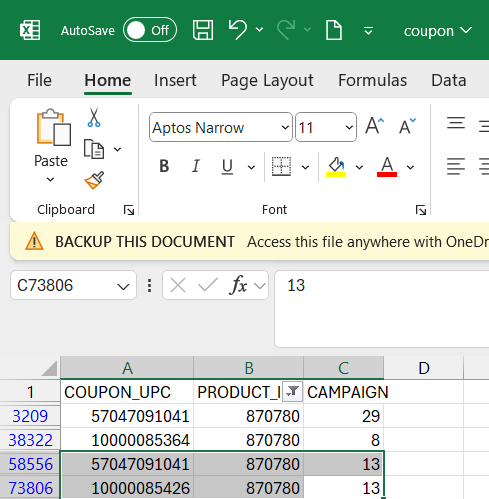

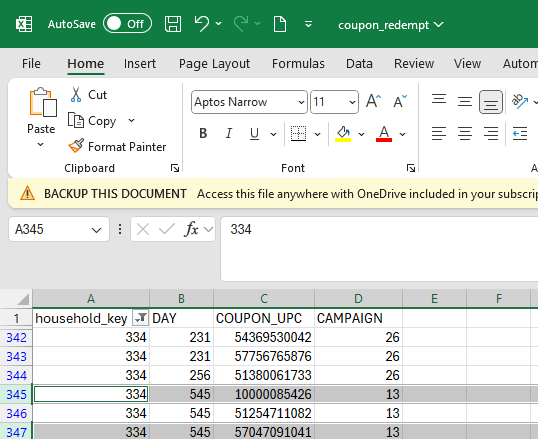![image.png]()

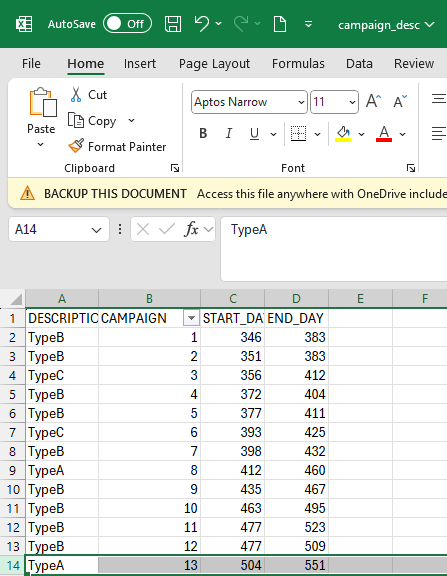

##Handling with duplicate rows

In [ ]:
df_trans_x_couponredempt_duplicate = df_trans_x_couponredempt[df_trans_x_couponredempt['surrogate_key'].isin(list_of_dup_surrogate_key)].copy()
df_trans_x_couponredempt_duplicate = df_trans_x_couponredempt[df_trans_x_couponredempt['surrogate_key'].isin(list_of_dup_surrogate_key)].copy()
df_trans_x_couponredempt_duplicate

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC,PRODUCT_ID_y,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt,keyredempt_hh_day_pid
24540,22,41352327180,640,916758,2,8.98,365,-3.00,1250,92,...,4.99,24541,22_640_916758,5.485001e+10,916758.0,22.0,22.0,640.0,1.0,22_640_916758
24541,22,41352327180,640,916758,2,8.98,365,-3.00,1250,92,...,4.99,24541,22_640_916758,5.485001e+10,916758.0,18.0,22.0,640.0,1.0,22_640_916758
64815,67,41338392515,639,999104,2,5.00,391,-0.68,1644,92,...,3.00,64815,67_639_999104,5.485001e+10,999104.0,22.0,67.0,639.0,1.0,67_639_999104
64816,67,41338392515,639,999104,2,5.00,391,-0.68,1644,92,...,3.00,64815,67_639_999104,5.485001e+10,999104.0,18.0,67.0,639.0,1.0,67_639_999104
135272,127,40642805807,595,6039584,1,5.29,31401,0.00,1538,86,...,6.29,135271,127_595_6039584,5.111112e+10,6039584.0,14.0,127.0,595.0,1.0,127_595_6039584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552948,2478,41366615382,641,1125391,1,2.00,356,-1.79,2038,92,...,2.00,2552855,2478_641_1125391,5.211310e+10,1125391.0,18.0,2478.0,641.0,1.0,2478_641_1125391
2552950,2478,41366615382,641,1139569,1,2.00,356,-2.19,2038,92,...,2.00,2552857,2478_641_1139569,1.000009e+10,1139569.0,18.0,2478.0,641.0,1.0,2478_641_1139569
2552951,2478,41366615382,641,1139569,1,2.00,356,-2.19,2038,92,...,2.00,2552857,2478_641_1139569,5.211310e+10,1139569.0,18.0,2478.0,641.0,1.0,2478_641_1139569
2570633,2489,35145556678,515,961554,1,1.50,362,-0.49,1819,74,...,1.50,2570539,2489_515_961554,1.000009e+10,961554.0,13.0,2489.0,515.0,1.0,2489_515_961554


In [ ]:
grp_by_col = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID_x', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC',
       'If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo', 'Actual_card_price', 'Cust_paid_price',
       'surrogate_key', 'keytrans_hh_day_pid', 'PRODUCT_ID_y',
       'CAMPAIGN', 'household_key_redempt', 'DAY_redempt', 'Is_coupon_redempt',
       'keyredempt_hh_day_pid']
grp_by_col

['household_key',
 'BASKET_ID',
 'DAY',
 'PRODUCT_ID_x',
 'QUANTITY',
 'SALES_VALUE',
 'STORE_ID',
 'RETAIL_DISC',
 'TRANS_TIME',
 'WEEK_NO',
 'COUPON_DISC',
 'COUPON_MATCH_DISC',
 'TOTAL_DISC',
 'If_used_retail_loyalprog',
 'If_used_manu_coupon',
 'If_used_giveaway_promo',
 'Actual_card_price',
 'Cust_paid_price',
 'surrogate_key',
 'keytrans_hh_day_pid',
 'PRODUCT_ID_y',
 'CAMPAIGN',
 'household_key_redempt',
 'DAY_redempt',
 'Is_coupon_redempt',
 'keyredempt_hh_day_pid']

In [ ]:
# Find the index of the row with the minimum COUPON_UPC for each surrogate_key
min_coupon_record = df_trans_x_couponredempt_duplicate.groupby('surrogate_key')['COUPON_UPC'].min()
min_coupon_record = min_coupon_record.reset_index()
min_coupon_record

,surrogate_key,COUPON_UPC
0,24541,5.485001e+10
1,64815,5.485001e+10
2,135271,5.111112e+10
3,168757,1.000009e+10
4,168775,1.000009e+10
...,...,...
91,2552848,1.000009e+10
92,2552852,5.485001e+10
93,2552855,1.000009e+10
94,2552857,1.000009e+10


In [ ]:
min_coupon_record = dict(zip(min_coupon_record['surrogate_key'], min_coupon_record['COUPON_UPC']))
print(min_coupon_record)

{24541: 54850010033.0, 64815: 54850010033.0, 135271: 51111120001.0, 168757: 10000085477.0, 168775: 10000085477.0, 236057: 10000085361.0, 252543: 10000085426.0, 252544: 10000085426.0, 252574: 54100027032.0, 252595: 54100027032.0, 252834: 10000085478.0, 252871: 10000085478.0, 252882: 10000085478.0, 252891: 10000085478.0, 328776: 10000085426.0, 328790: 10000085426.0, 328793: 10000085426.0, 363192: 53800050033.0, 363197: 53800050033.0, 363217: 10000085361.0, 363219: 10000085361.0, 363831: 10000085477.0, 363838: 10000085477.0, 553981: 10000085364.0, 573262: 10000085478.0, 592083: 10000085478.0, 621332: 54100027032.0, 621351: 54100027032.0, 876752: 53800050033.0, 891063: 54100027032.0, 891067: 54100027032.0, 891072: 54100027032.0, 940071: 10000085363.0, 940525: 10000085477.0, 940547: 10000085477.0, 940556: 10000085477.0, 940584: 10000085477.0, 940586: 10000085477.0, 940638: 10000085477.0, 940644: 10000085477.0, 940651: 10000085477.0, 962362: 10000085427.0, 998411: 54850010033.0, 1004504: 548

In [ ]:
if 24541 in min_coupon_record.keys():
  print(min_coupon_record[24541])

54850010033.0


In [ ]:
def replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace):
  if df[col_key_name] in dict_kv_replace.keys():
    df[col_val_name] = dict_kv_replace[df[col_key_name]]
  return df

In [ ]:
df_trans_x_couponredempt_duplicate

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC,PRODUCT_ID_y,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt,keyredempt_hh_day_pid
24540,22,41352327180,640,916758,2,8.98,365,-3.00,1250,92,...,4.99,24541,22_640_916758,5.485001e+10,916758.0,22.0,22.0,640.0,1.0,22_640_916758
24541,22,41352327180,640,916758,2,8.98,365,-3.00,1250,92,...,4.99,24541,22_640_916758,5.485001e+10,916758.0,18.0,22.0,640.0,1.0,22_640_916758
64815,67,41338392515,639,999104,2,5.00,391,-0.68,1644,92,...,3.00,64815,67_639_999104,5.485001e+10,999104.0,22.0,67.0,639.0,1.0,67_639_999104
64816,67,41338392515,639,999104,2,5.00,391,-0.68,1644,92,...,3.00,64815,67_639_999104,5.485001e+10,999104.0,18.0,67.0,639.0,1.0,67_639_999104
135272,127,40642805807,595,6039584,1,5.29,31401,0.00,1538,86,...,6.29,135271,127_595_6039584,5.111112e+10,6039584.0,14.0,127.0,595.0,1.0,127_595_6039584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552948,2478,41366615382,641,1125391,1,2.00,356,-1.79,2038,92,...,2.00,2552855,2478_641_1125391,5.211310e+10,1125391.0,18.0,2478.0,641.0,1.0,2478_641_1125391
2552950,2478,41366615382,641,1139569,1,2.00,356,-2.19,2038,92,...,2.00,2552857,2478_641_1139569,1.000009e+10,1139569.0,18.0,2478.0,641.0,1.0,2478_641_1139569
2552951,2478,41366615382,641,1139569,1,2.00,356,-2.19,2038,92,...,2.00,2552857,2478_641_1139569,5.211310e+10,1139569.0,18.0,2478.0,641.0,1.0,2478_641_1139569
2570633,2489,35145556678,515,961554,1,1.50,362,-0.49,1819,74,...,1.50,2570539,2489_515_961554,1.000009e+10,961554.0,13.0,2489.0,515.0,1.0,2489_515_961554


In [ ]:
df_trans_x_couponredempt_unduplicate = df_trans_x_couponredempt_duplicate.apply(lambda x: replace_valueindf(x,'surrogate_key','COUPON_UPC',min_coupon_record),axis=1)
df_trans_x_couponredempt_unduplicate

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC,PRODUCT_ID_y,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt,keyredempt_hh_day_pid
24540,22,41352327180,640,916758,2,8.98,365,-3.00,1250,92,...,4.99,24541,22_640_916758,5.485001e+10,916758.0,22.0,22.0,640.0,1.0,22_640_916758
24541,22,41352327180,640,916758,2,8.98,365,-3.00,1250,92,...,4.99,24541,22_640_916758,5.485001e+10,916758.0,18.0,22.0,640.0,1.0,22_640_916758
64815,67,41338392515,639,999104,2,5.00,391,-0.68,1644,92,...,3.00,64815,67_639_999104,5.485001e+10,999104.0,22.0,67.0,639.0,1.0,67_639_999104
64816,67,41338392515,639,999104,2,5.00,391,-0.68,1644,92,...,3.00,64815,67_639_999104,5.485001e+10,999104.0,18.0,67.0,639.0,1.0,67_639_999104
135272,127,40642805807,595,6039584,1,5.29,31401,0.00,1538,86,...,6.29,135271,127_595_6039584,5.111112e+10,6039584.0,14.0,127.0,595.0,1.0,127_595_6039584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552948,2478,41366615382,641,1125391,1,2.00,356,-1.79,2038,92,...,2.00,2552855,2478_641_1125391,1.000009e+10,1125391.0,18.0,2478.0,641.0,1.0,2478_641_1125391
2552950,2478,41366615382,641,1139569,1,2.00,356,-2.19,2038,92,...,2.00,2552857,2478_641_1139569,1.000009e+10,1139569.0,18.0,2478.0,641.0,1.0,2478_641_1139569
2552951,2478,41366615382,641,1139569,1,2.00,356,-2.19,2038,92,...,2.00,2552857,2478_641_1139569,1.000009e+10,1139569.0,18.0,2478.0,641.0,1.0,2478_641_1139569
2570633,2489,35145556678,515,961554,1,1.50,362,-0.49,1819,74,...,1.50,2570539,2489_515_961554,1.000009e+10,961554.0,13.0,2489.0,515.0,1.0,2489_515_961554


In [ ]:
col_to_keep = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID_x', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC',
       'If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo', 'Actual_card_price', 'Cust_paid_price',
       'surrogate_key', 'keytrans_hh_day_pid', 'COUPON_UPC']
df_trans_x_couponredempt_unduplicate = df_trans_x_couponredempt_unduplicate[col_to_keep]
df_trans_x_couponredempt_unduplicate = df_trans_x_couponredempt_unduplicate.drop_duplicates()
df_trans_x_couponredempt_unduplicate

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,COUPON_MATCH_DISC,TOTAL_DISC,If_used_retail_loyalprog,If_used_manu_coupon,If_used_giveaway_promo,Actual_card_price,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC
24540,22,41352327180,640,916758,2,8.98,365,-3.00,1250,92,...,0.00,-3.00,1,0,0,5.99,4.99,24541,22_640_916758,5.485001e+10
64815,67,41338392515,639,999104,2,5.00,391,-0.68,1644,92,...,0.00,-0.68,1,0,0,2.84,3.00,64815,67_639_999104,5.485001e+10
135272,127,40642805807,595,6039584,1,5.29,31401,0.00,1538,86,...,0.00,0.00,0,0,0,5.29,6.29,135271,127_595_6039584,5.111112e+10
168759,164,40666816100,597,971486,1,3.99,404,-0.70,1322,86,...,0.00,-0.70,1,0,0,4.69,4.99,168757,164_597_971486,1.000009e+10
168778,164,40666816100,597,1115360,1,0.50,404,-0.40,1322,86,...,-0.49,-0.89,1,1,0,1.39,1.00,168775,164_597_1115360,1.000009e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552938,2478,41366615382,641,956284,1,2.00,356,-2.19,2038,92,...,0.00,-2.19,1,0,0,4.19,3.00,2552848,2478_641_956284,1.000009e+10
2552943,2478,41366615382,641,999104,2,5.00,356,-0.98,2038,92,...,0.00,-0.98,1,0,0,2.99,3.00,2552852,2478_641_999104,5.485001e+10
2552947,2478,41366615382,641,1125391,1,2.00,356,-1.79,2038,92,...,0.00,-1.79,1,0,0,3.79,2.00,2552855,2478_641_1125391,1.000009e+10
2552950,2478,41366615382,641,1139569,1,2.00,356,-2.19,2038,92,...,0.00,-2.19,1,0,0,4.19,2.00,2552857,2478_641_1139569,1.000009e+10


In [ ]:
df_trans_x_couponredempt

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC,PRODUCT_ID_y,CAMPAIGN,household_key_redempt,DAY_redempt,Is_coupon_redempt,keyredempt_hh_day_pid
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,...,3.99,1,1_51_825123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,...,2.99,2,1_51_831447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,...,1.09,3,1_51_840361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,...,3.71,4,1_51_845307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,...,2.79,5,1_51_852014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581357,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,...,3.19,2581262,2500_708_1109947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581358,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,...,1.99,2581263,2500_708_1117514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581359,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,...,2.59,2581264,2500_708_8019186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581360,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,...,3.77,2581265,2500_708_15596705,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Validate result

In [ ]:
df_trans_x_couponredempt = df_trans_x_couponredempt.apply(lambda x: replace_valueindf(x,'surrogate_key','COUPON_UPC',min_coupon_record),axis=1)
df_trans_x_couponredempt = df_trans_x_couponredempt[col_to_keep]
df_trans_x_couponredempt = df_trans_x_couponredempt.drop_duplicates()
df_trans_x_couponredempt

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,COUPON_MATCH_DISC,TOTAL_DISC,If_used_retail_loyalprog,If_used_manu_coupon,If_used_giveaway_promo,Actual_card_price,Cust_paid_price,surrogate_key,keytrans_hh_day_pid,COUPON_UPC
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,...,0.0,0.00,0,0,0,3.99,3.99,1,1_51_825123,NaN
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,...,0.0,0.00,0,0,0,2.99,2.99,2,1_51_831447,NaN
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,...,0.0,-0.30,1,0,0,1.39,1.09,3,1_51_840361,NaN
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,...,0.0,-0.62,1,0,0,4.33,3.71,4,1_51_845307,NaN
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,...,0.0,-1.20,1,0,0,3.99,2.79,5,1_51_852014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581357,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,...,0.0,-0.80,1,0,0,3.99,3.19,2581262,2500_708_1109947,NaN
2581358,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,...,0.0,0.00,0,0,0,1.99,1.99,2581263,2500_708_1117514,NaN
2581359,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,...,0.0,-1.00,1,0,0,3.59,2.59,2581264,2500_708_8019186,NaN
2581360,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,...,0.0,-3.02,1,0,0,5.79,3.77,2581265,2500_708_15596705,NaN


In [ ]:
2581362 - 2581266

96

In [ ]:
df_trans_x_couponredempt_count = df_trans_x_couponredempt.groupby('surrogate_key')['BASKET_ID'].count().reset_index(name='count').sort_values(['count'], ascending=False)
df_trans_x_couponredempt_count[df_trans_x_couponredempt_count['count']>1]

,surrogate_key,count


In [ ]:
df_trans_x_couponredempt_count[df_trans_x_couponredempt_count['count']==1]

,surrogate_key,count
0,1,1
1720847,1720848,1
1720840,1720841,1
1720841,1720842,1
1720842,1720843,1
...,...,...
860422,860423,1
860423,860424,1
860424,860425,1
860425,860426,1


In [ ]:
col_to_keep = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID_x', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC',
       'If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo', 'Actual_card_price', 'Cust_paid_price',
        'COUPON_UPC']

In [ ]:
df_trans_x_couponredempt = df_trans_x_couponredempt[col_to_keep]
df_trans_x_couponredempt

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TOTAL_DISC,If_used_retail_loyalprog,If_used_manu_coupon,If_used_giveaway_promo,Actual_card_price,Cust_paid_price,COUPON_UPC
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,3.99,3.99,NaN
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,2.99,2.99,NaN
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,0.0,0.0,-0.30,1,0,0,1.39,1.09,NaN
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,0.0,0.0,-0.62,1,0,0,4.33,3.71,NaN
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,0.0,0.0,-1.20,1,0,0,3.99,2.79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581357,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,0.0,0.0,-0.80,1,0,0,3.99,3.19,NaN
2581358,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,0.0,0.0,0.00,0,0,0,1.99,1.99,NaN
2581359,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,0.0,0.0,-1.00,1,0,0,3.59,2.59,NaN
2581360,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,-1.0,0.0,-3.02,1,0,0,5.79,3.77,NaN


In [ ]:
df_trans_x_couponredempt['COUPON_UPC'] = df_trans_x_couponredempt['COUPON_UPC'].astype('Int64')
df_trans_x_couponredempt

,household_key,BASKET_ID,DAY,PRODUCT_ID_x,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TOTAL_DISC,If_used_retail_loyalprog,If_used_manu_coupon,If_used_giveaway_promo,Actual_card_price,Cust_paid_price,COUPON_UPC
0,1,27601281299,51,825123,1,3.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,3.99,3.99,<NA>
1,1,27601281299,51,831447,1,2.99,436,0.00,1456,8,0.0,0.0,0.00,0,0,0,2.99,2.99,<NA>
2,1,27601281299,51,840361,1,1.09,436,-0.30,1456,8,0.0,0.0,-0.30,1,0,0,1.39,1.09,<NA>
3,1,27601281299,51,845307,1,3.71,436,-0.62,1456,8,0.0,0.0,-0.62,1,0,0,4.33,3.71,<NA>
4,1,27601281299,51,852014,1,2.79,436,-1.20,1456,8,0.0,0.0,-1.20,1,0,0,3.99,2.79,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581357,2500,42250641157,708,1109947,1,3.19,447,-0.80,1620,102,0.0,0.0,-0.80,1,0,0,3.99,3.19,<NA>
2581358,2500,42250641157,708,1117514,1,1.99,447,0.00,1620,102,0.0,0.0,0.00,0,0,0,1.99,1.99,<NA>
2581359,2500,42250641157,708,8019186,1,2.59,447,-1.00,1620,102,0.0,0.0,-1.00,1,0,0,3.59,2.59,<NA>
2581360,2500,42250641157,708,15596705,1,2.77,447,-3.02,1620,102,-1.0,0.0,-3.02,1,0,0,5.79,3.77,<NA>


# Export result

In [ ]:
export_to_csv(path_folder,'fact_trans_x_couponredempt',df_trans_x_couponredempt)

fact_trans_x_couponredempt.csv has been exported successfully.
